# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. the data provides information on the patients such as PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, their Age, Neighbourhood, Scholarship (indicating whether or not they are enrolled in Brasilian welfare program Bolsa Família),whether they had existing conditions such as	Hipertension, Diabetes,Alcoholism or Handcap, whether or not patients received sms reminders(SMS_received) and finally whether they showed up for the appointment or not(No-show)


### Question(s) for Analysis
1. Determine the distribution of patients that showed up by age?

2. Which gender had a higher appointment show rate?

3. Does patients that received reminders increase the rate of appointments show rate?

4. How does the rate of show compare between patients enrolled in the welfare program and those not enrolled?




In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [3]:
#importing the data
df = pd.read_csv('noshowappointments.csv')
# display first five rows of data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#checking the number of rows and columns in the data
df.shape

(110527, 14)

In [4]:
#checking the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#description of object items
df.describe(include='object')

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


from the overview of the data, we can see that we have 14 columns and 110527 rows. we can also see that we do not have any 
missing entries since all 14 variable have data in all rows. from the description of the data, the mean age of the patients 
is 37. wecan also see that the majority of the patients in the data are female and that the neighborhood with the most patients 
is Jardim Camburi (7717 patients).

from the description, we note that the column heads have title case. In addition, the Overview and Notes section of the data indicates that the last column is encoded ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. we'll need to amend this to avoid confusion/ wrong analysis.

its worth noting that most of the variables are categorical.


### Data Cleaning

 

In [7]:
df.columns = ('patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'SMS_received', 'no_show')
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


the previous code renames the column heads to adopt the naming best practices(using small letters and '_')

In [8]:
df['show_up'] = df.no_show.replace(['No', 'Yes'], ['Yes', 'No'])
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,SMS_received,no_show,show_up
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Yes
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Yes
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Yes
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Yes
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Yes


the code above creates a new column labelled 'show_up' with the entries amended as well

In [9]:
#cut age
bins =[-1,14,24,35,59,115]
labels = ['children', 'youth', 'young_adults', 'middle_age_adults', 'seniors']
df['age_brackets'] = pd.cut(df['age'], bins, labels=labels)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,SMS_received,no_show,show_up,age_brackets
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Yes,seniors
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Yes,middle_age_adults
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Yes,seniors
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Yes,children
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Yes,middle_age_adults


i have developed a column called age_brackets that groups the patients based on their age. 

In [10]:
#dropping the unrequired columns for this analysis
df.drop(['appointment_id','neighbourhood','age','appointment_day','alcoholism','handcap',
         'scheduled_day','hipertension','diabetes','patient_id','no_show'], axis = 1, inplace = True)
df.head()


,gender,scholarship,SMS_received,show_up,age_brackets
0,F,0,0,Yes,seniors
1,M,0,0,Yes,middle_age_adults
2,F,0,0,Yes,seniors
3,F,0,0,Yes,children
4,F,0,0,Yes,middle_age_adults


Dropped all the other columns and left with only those that are necessary for this analysis

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 Which gender had a higher appointment show rate?

In [11]:
def proportions (col):
    x = df[col].value_counts(normalize=True)
    return x * 100

proportions('gender')


F    64.997693
M    35.002307
Name: gender, dtype: float64

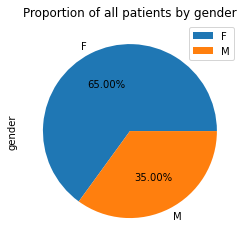

In [15]:
proportions('gender').plot(kind = 'pie', autopct='%.2f%%')
plt.title('Proportion of all patients by gender')
plt.legend(loc='upper right');

this chart shows the proportion of the patients by gender.

In [12]:

def grouped_by (variable1, variable2):
    x = df.groupby(df[variable1])[variable2].value_counts(normalize=True).unstack()
    return x *100
show_by_gender = grouped_by('gender', 'show_up')
show_by_gender

show_up,No,Yes
gender,,
F,20.314588,79.685412
M,19.967948,80.032052


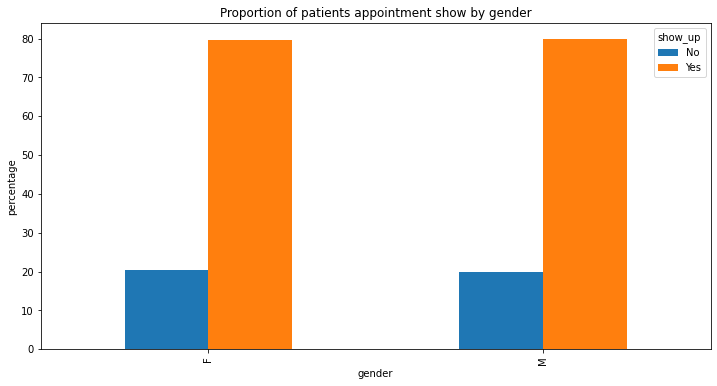

In [19]:
show_by_gender.plot(kind = 'bar', figsize = (12,6), ylabel = 'percentage')
plt.title('Proportion of patients appointment show by gender');

To understand the data, i have explored the variables individually by looking at the proportions for each 
variable and also the proportions of patients grouped by each variable and whether or not they showed up.

To facilite this, i have defined two functions, proportions - that returns the percentages of patients in each category- and
group_by that return the proportion of patients that showed up in each category.

Finally, the data is visualized using charts

### Research Question 2  Determine the distribution of patients that showed up by age?

In [36]:
proportions('age_brackets')


middle_age_adults    32.888189
children             21.042108
seniors              19.156579
young_adults         14.237374
youth                12.675751
Name: age_brackets, dtype: float64

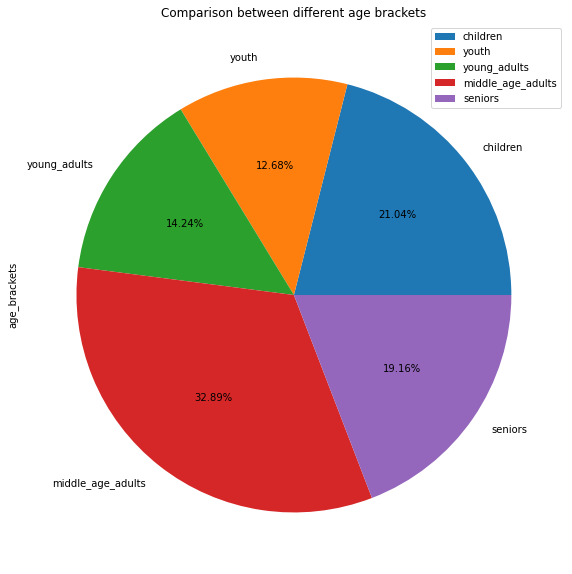

In [16]:
df.groupby(['age_brackets']).age_brackets.count().plot(kind='pie', figsize = (20, 10), autopct='%.2f%%') 
plt.title('Comparison between different age brackets')
plt.legend(loc='upper right');

This chart shows the proportion of patient under different age groups

In [37]:
show_by_age = grouped_by('age_brackets', 'show_up')
show_by_age

show_up,No,Yes
age_brackets,,
children,21.180720,78.819280
youth,25.267666,74.732334
young_adults,23.093543,76.906457
middle_age_adults,19.193948,80.806052
seniors,15.311954,84.688046


In [21]:
group_by_gender_age = df.groupby(df['age_brackets'])[['gender','show_up']].value_counts(normalize=True).unstack()
group_by_gender_age = group_by_gender_age * 100
group_by_gender_age

show_up                          No        Yes
age_brackets      gender                      
children          F       10.207679  37.945565
                  M       10.973040  40.873715
youth             F       17.865810  53.254818
                  M        7.401856  21.477516
young_adults      F       16.846721  55.668531
                  M        6.246823  21.237926
middle_age_adults F       13.276479  55.438790
                  M        5.917469  25.367263
seniors           F       10.579512  56.897936
                  M        4.732442  27.790110

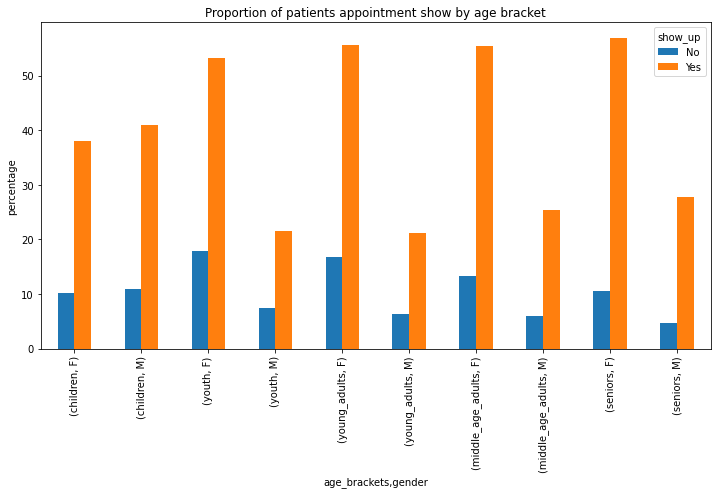

In [22]:
group_by_gender_age.plot(kind = 'bar', figsize = (12,6), ylabel = 'percentage')
plt.title('Proportion of patients appointment show by age bracket and gender');

Here i have called the functions created earlier to review the age distribution of the patients as well as the proportion 
of the patients that showed up for each age bracket. For the bar chart, i have plotted the percentages grouped by age and 
disaggregated by gender.

### Research Question 3  Does patients that received reminders increase the rate of appointments show rate?

In [45]:
proportions('SMS_received')

0    67.897437
1    32.102563
Name: SMS_received, dtype: float64

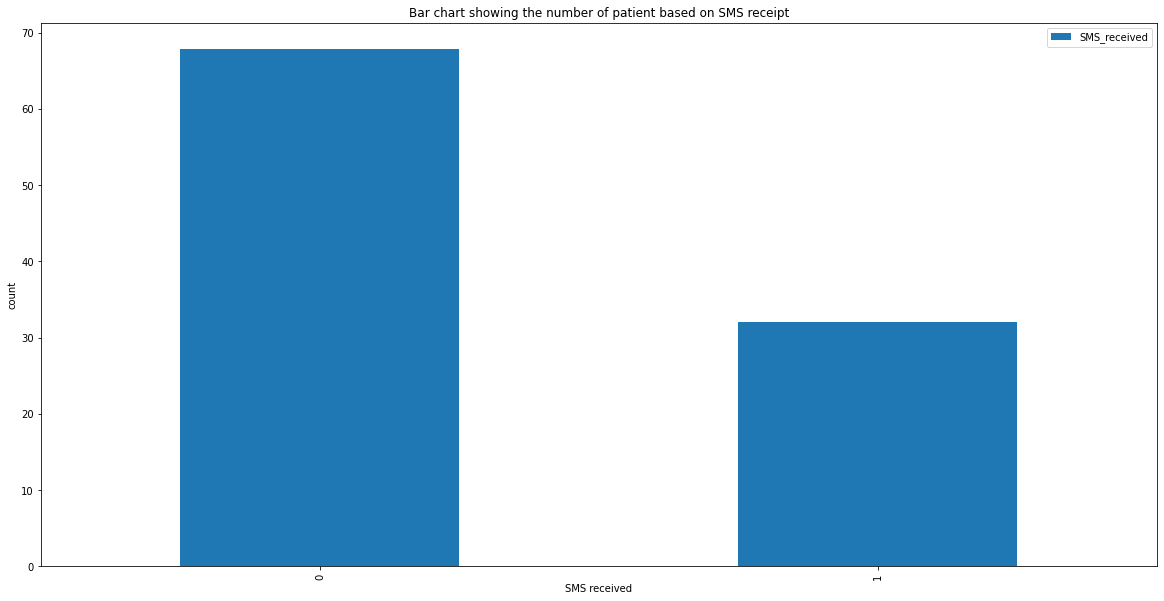

In [47]:
proportions('SMS_received').plot(kind='bar', figsize = (20, 10))
plt.title('Bar chart showing the number of patient based on SMS receipt')
plt.xlabel ('SMS received')
plt.ylabel('count')
plt.legend(loc='upper right');

From the bar chart above, we can see that a higher number of patients received the SMS. This is seen in the proportions
as well where 67.9% received the SMS while 32.1% did not.

In [28]:
show_by_SMS = grouped_by('SMS_received', 'show_up')
show_by_SMS

show_up,No,Yes
SMS_received,,
0,16.703311,83.296689
1,27.574545,72.425455


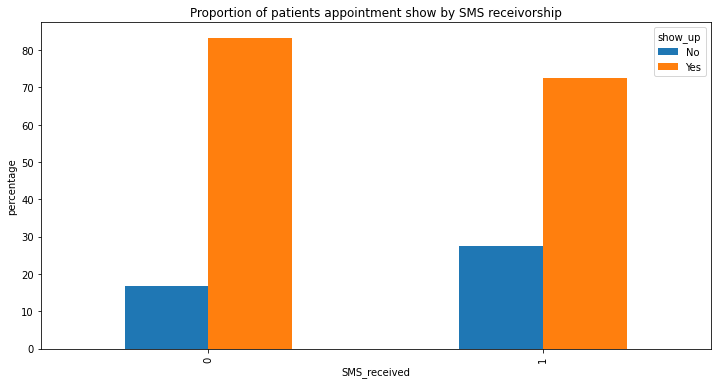

In [29]:
show_by_SMS.plot(kind = 'bar', figsize = (12,6), ylabel = 'percentage')
plt.title('Proportion of patients appointment show by SMS receivorship');

The chart above compares the rate based on the SMS reminders.Evidently, a higher proportion of patients that received 
SMS reminders showed up for the appointments compared to those that didn't receive the reminders. the reverse is also true.

### Research Question 4  How does the rate of show compare between patients enrolled in the welfare program and those not enrolled?

In [44]:
proportions('scholarship')

0    90.173442
1     9.826558
Name: scholarship, dtype: float64

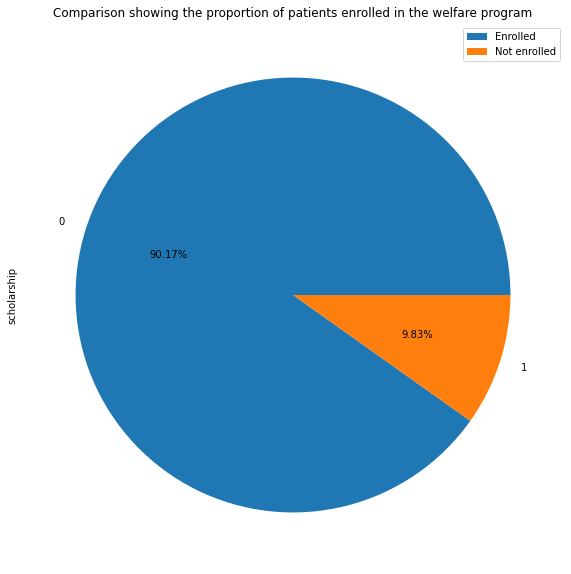

In [52]:
proportions('scholarship').plot(kind='pie', figsize = (20, 10), autopct='%.2f%%') 
plt.title('Comparison showing the proportion of patients enrolled in the welfare program')
plt.legend(['Enrolled', 'Not enrolled'], loc='upper right');

The chart above shows the distribution of patients enrolled in the welfare program. We can see the a majority, 90.17% are enrolled.

In [54]:
show_by_welfare = grouped_by('scholarship', 'show_up')
show_by_welfare

show_up,No,Yes
scholarship,,
0,19.807156,80.192844
1,23.736304,76.263696


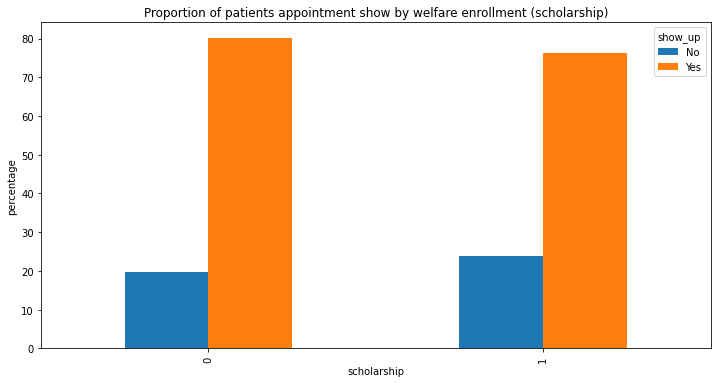

In [57]:
show_by_welfare.plot(kind = 'bar', figsize = (12,6), ylabel = 'percentage')
plt.title('Proportion of patients appointment show by welfare enrollment (scholarship)');

The chart above compares the appointment show rate based on the welfare enrollment.A slightly higher proportion of patients thatnare enrolled in the welfare showed up for the appointments compared to those not enrolled.

## Conclusions

From the data, there is a higher number of female patients 65% as compared to male patients 35%. A slightly higher 
proportion of males showed up compared to female at 80% and 79.7% respectively. in terms of age, the middle aged adults had the 
highest proportion of patients at 32.8 followed by children at 21.%. the youth formed the least proportion of the patients at 
12%. the age bracket with the highest percentage of appointment show rate was the seniors at 84%. Among the seniors that showed
up, the majority were females 56.9%. one the other hand, the youths had the highest rate of no show for the appointments, 25.3%.

Comparing the rate based on the SMS reminders, 83.3% of patients that received SMS reminders showed up for the appointments 
compared to 72.4% of those that didn't receive the reminders. A majority 90.2% of the patients were enrolled in the welfare 
program with 80.2 % of these showing up for the appointments. On the other hand, 76.3 of those not enrolled in th e welfare 
program showed up.

This analysis only reviews the patient's characteritics without looking at the cause effect relationship. an in depth 
analysis is needed to deterine causation

## Resources


https://dfrieds.com/data-analysis/categorical-data-python-pandas.html
https://pandas.pydata.org/docs/index.html
https://stackoverflow.com/questions/53690279/pandas-percentage-count-of-categorical-variable
https://www.geeksforgeeks.org/python-pandas-dataframe-replace/
https://stackoverflow.com/questions/24640399/how-to-unstack-or-pivot-in-pandas   

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])